### Machine Learning Workflow:
__1. Extract Features <br/>__
* a. Features and target should not have any null values<br/>
* b. Features should be numeric (handle categorical values)<br/>
* c. Features should be of the type array/ dataframe<br/>
* d. Features should be having some rows and columns<br/>
* e. Features should be on the same scale<br/>

__2. Split the dataset into training and testing datasets<br/>__

__3. Train the model on the training set__<br/>
* a. Import the necessary library
* b. Instantiate an object
* c. .fit() on training data <br/>

__4. Test/ Evaluate the model on the testing set__
* a. .predict() on test data
* b. Evaluate the performance (Compare the Actual vs. Predicted values)


<hr>

Lets load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


# Load data and Check Basic Details

### Load File

In [2]:
tele_data = pd.read_csv("D://datasets/teleCust1000t.csv")
tele_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


### Check Size of Data

In [3]:
tele_data.shape

(1000, 12)

### Check various Data type

In [4]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null int64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: int64(12)
memory usage: 93.9 KB


### Check Statistical info of Data

In [5]:
tele_data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Check the Missing Value in Data

In [6]:
tele_data.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis </h2> 
</div>


#### Check  how many of each class is in our data set 

In [7]:
tele_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### Plot a Pair plot and Note down important point

In [10]:
tele_data.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


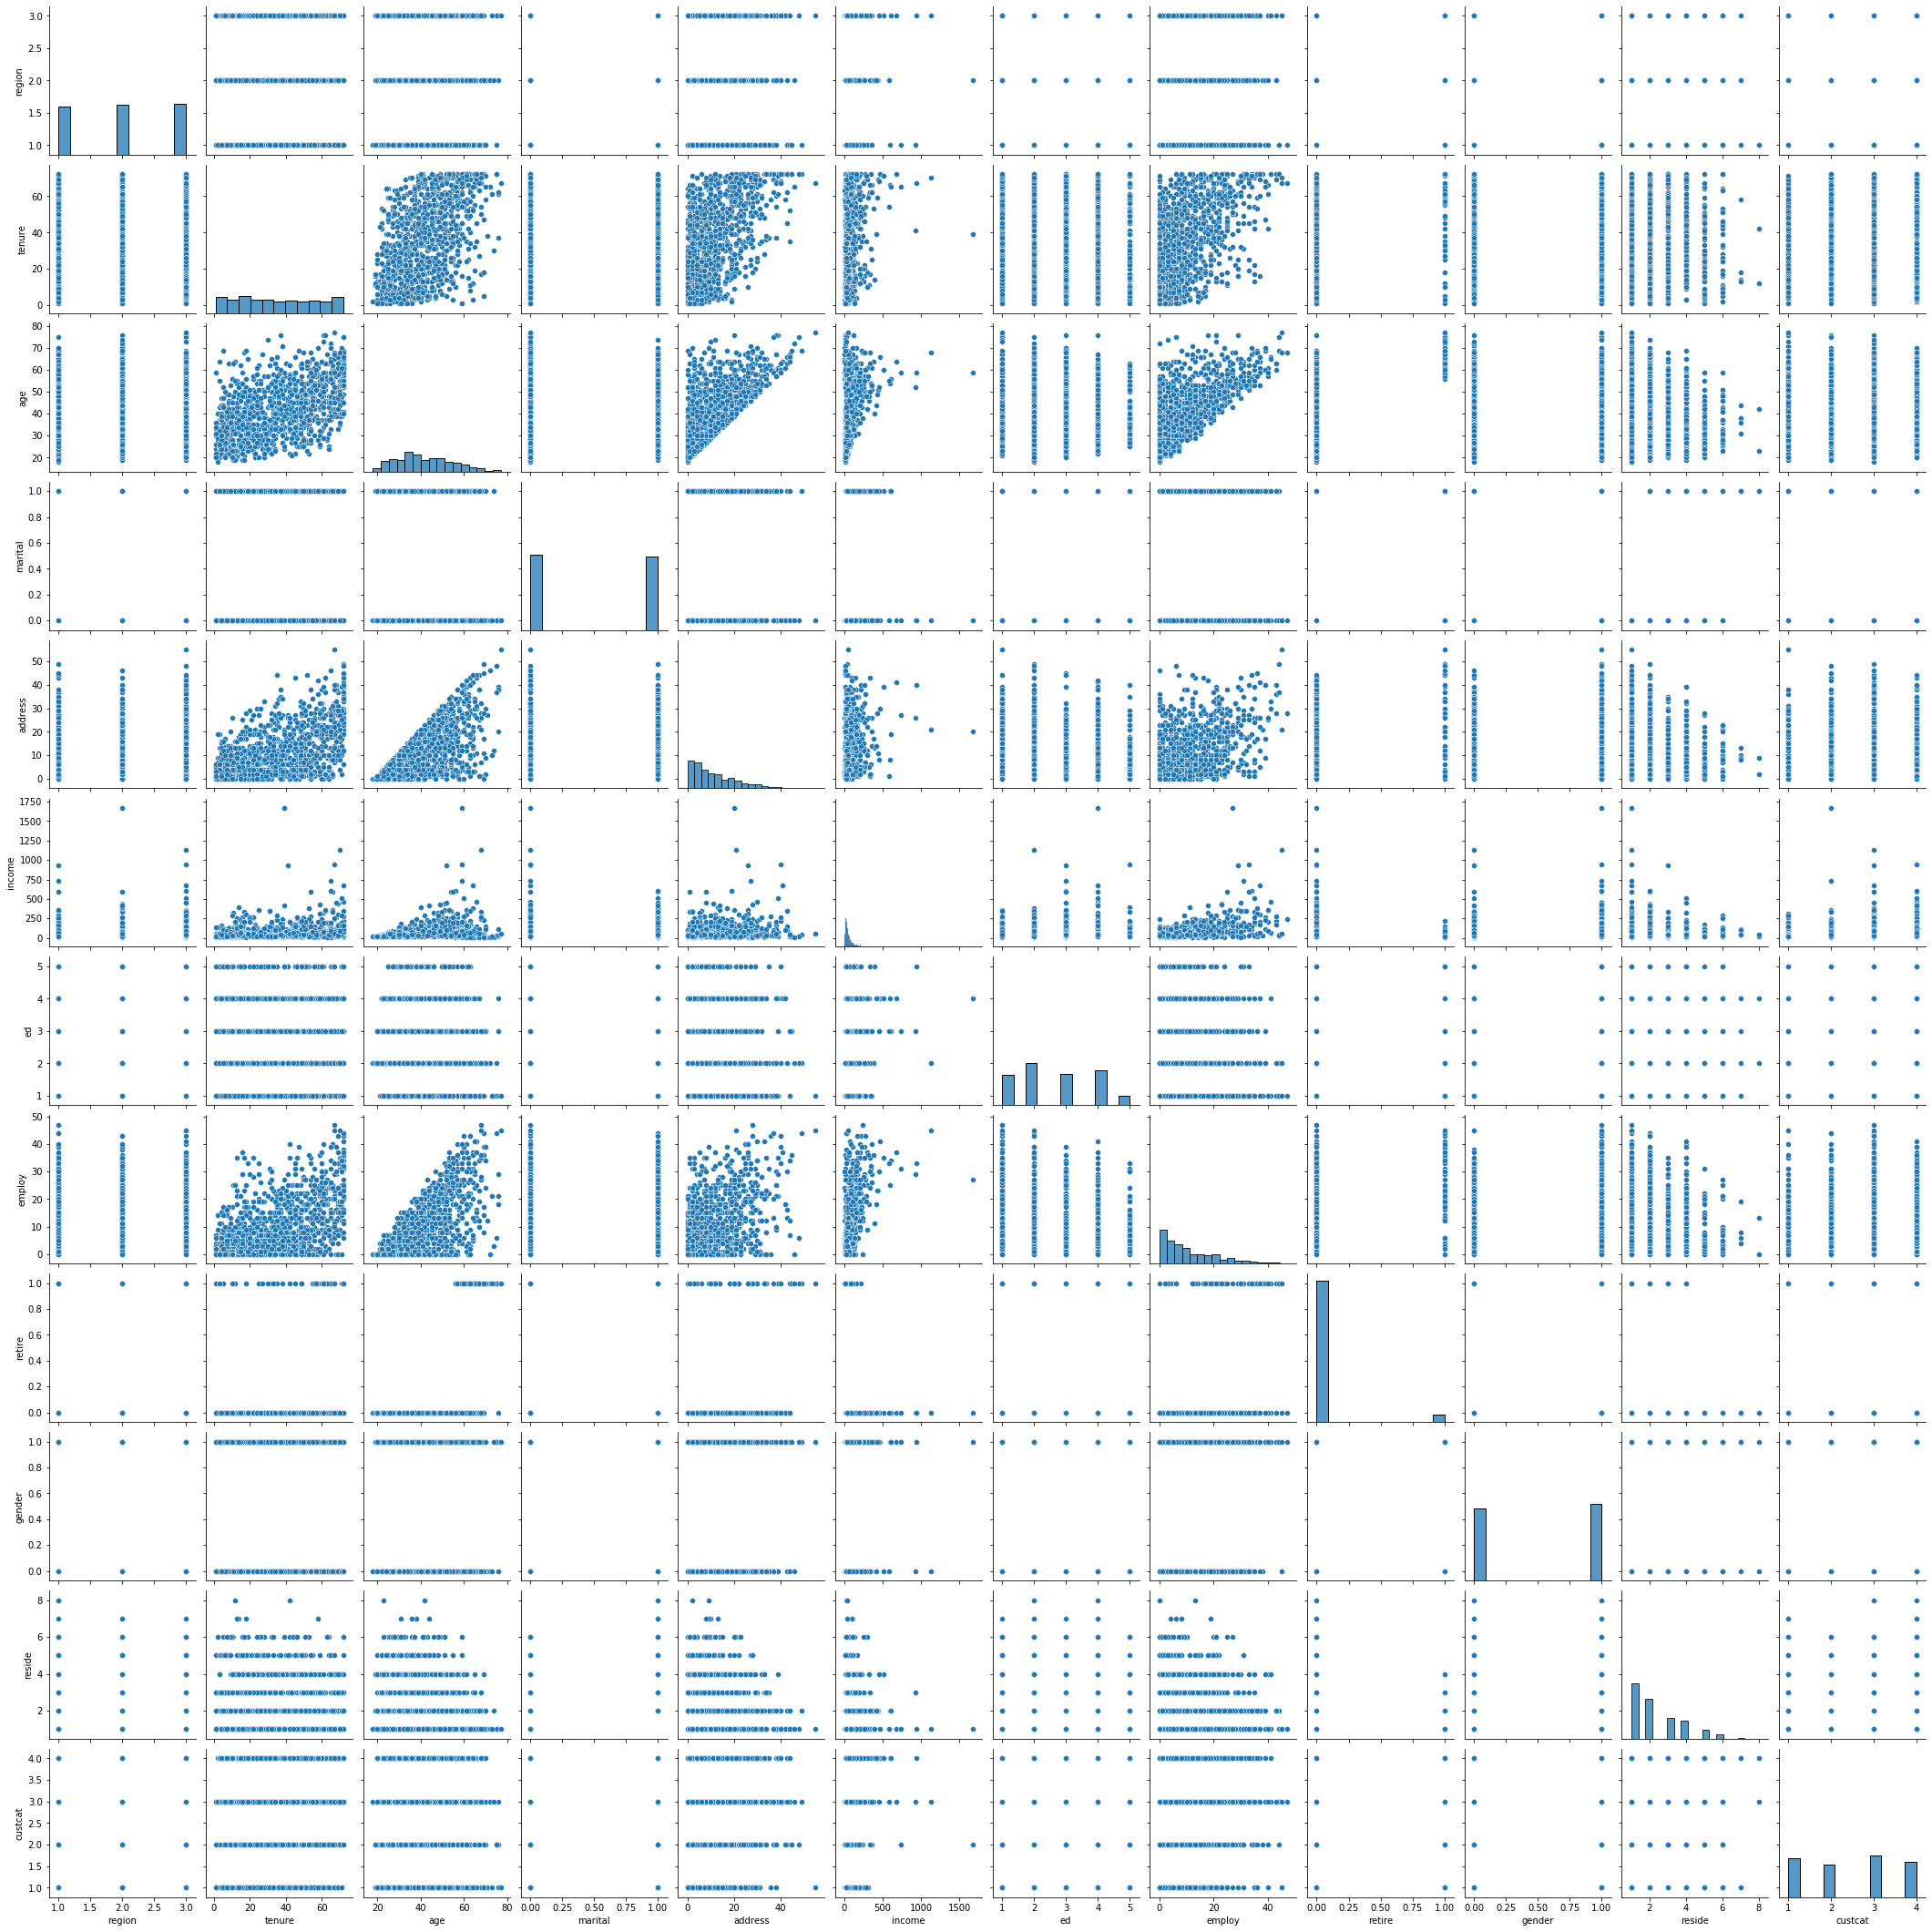

In [8]:
sns.pairplot(data=tele_data)
plt.show()

### Check Income using histogram with 50 Bin

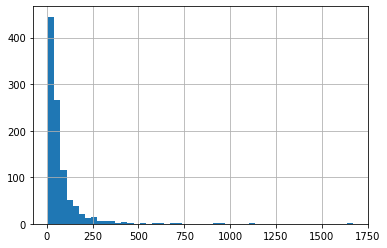

In [9]:
tele_data['income'].hist(bins=50)
plt.show()

### Feature set

Lets define feature sets, X:

In [11]:
tele_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
tele_data.values

array([[ 2, 13, 44, ...,  0,  2,  1],
       [ 3, 11, 33, ...,  0,  6,  4],
       [ 3, 68, 52, ...,  1,  2,  3],
       ...,
       [ 3, 67, 59, ...,  1,  1,  4],
       [ 3, 70, 49, ...,  1,  1,  3],
       [ 3, 50, 36, ...,  1,  3,  2]], dtype=int64)

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [13]:
X = tele_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X

array([[ 2, 13, 44, ...,  0,  0,  2],
       [ 3, 11, 33, ...,  0,  0,  6],
       [ 3, 68, 52, ...,  0,  1,  2],
       ...,
       [ 3, 67, 59, ...,  0,  1,  1],
       [ 3, 70, 49, ...,  0,  1,  1],
       [ 3, 50, 36, ...,  0,  1,  3]], dtype=int64)

What are our labels?

In [14]:
y = tele_data['custcat'].values
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

## Normalize/ Standardize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [19]:
X

array([[ 2, 13, 44, ...,  0,  0,  2],
       [ 3, 11, 33, ...,  0,  0,  6],
       [ 3, 68, 52, ...,  0,  1,  2],
       ...,
       [ 3, 67, 59, ...,  0,  1,  1],
       [ 3, 70, 49, ...,  0,  1,  1],
       [ 3, 50, 36, ...,  0,  1,  3]], dtype=int64)

In [15]:
# Importing the necessary library
from sklearn import preprocessing

In [16]:
# Instantiating the object
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [17]:
# Training/ Fitting the scales for input features X
scaler.fit(X)

StandardScaler()

In [18]:
# Transforming/ Applying the scales on input features X
X_scaled = scaler.transform(X)
X_scaled

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [20]:
# Using Chaning method
X_scaled2 = preprocessing.StandardScaler().fit(X).transform(X)
X_scaled2

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test split

In [22]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1, stratify=y)

In [72]:
print(X_train.shape)
print(X_test.shape)

print("-"*40)
print(y_train.shape)
print(y_test.shape)

(750, 11)
(250, 11)
----------------------------------------
(750,)
(250,)


In [73]:
print(y_train.mean())
print(y_test.mean())

2.488
2.484


In [74]:
X_train

array([[-0.02696767,  1.66161343, -0.05449098, ..., -0.22207644,
         0.96655883, -0.23065004],
       [-1.25277087, -0.77408309,  1.85747336, ..., -0.22207644,
        -1.03459817,  0.46617787],
       [-1.25277087, -1.3361669 , -0.61214725, ..., -0.22207644,
         0.96655883, -0.92747794],
       ...,
       [-1.25277087,  1.19321025,  0.34383492, ..., -0.22207644,
         0.96655883, -0.92747794],
       [-0.02696767,  1.52109247,  1.22015191, ..., -0.22207644,
         0.96655883, -0.23065004],
       [-1.25277087, -1.19564595, -0.85114279, ..., -0.22207644,
         0.96655883, -0.23065004]])

In [75]:
y_train

array([3, 3, 1, 4, 3, 2, 1, 4, 2, 3, 3, 1, 3, 4, 3, 3, 3, 1, 2, 4, 1, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 3, 2, 3, 4, 1, 2, 2, 2, 4, 2, 1, 3, 4,
       2, 3, 2, 3, 2, 1, 1, 3, 4, 3, 4, 2, 4, 3, 2, 2, 2, 3, 2, 1, 1, 3,
       2, 2, 4, 3, 4, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 1, 1, 3, 3, 1, 2, 3,
       1, 2, 3, 2, 3, 3, 4, 3, 3, 2, 4, 2, 4, 1, 2, 4, 3, 4, 1, 4, 4, 3,
       3, 4, 1, 2, 4, 4, 4, 3, 4, 3, 4, 1, 3, 2, 2, 4, 2, 1, 1, 2, 3, 4,
       4, 1, 3, 1, 4, 3, 4, 3, 3, 1, 1, 2, 1, 3, 3, 3, 3, 4, 3, 3, 1, 1,
       1, 2, 2, 1, 3, 3, 4, 1, 3, 1, 2, 1, 3, 3, 2, 3, 4, 4, 1, 4, 1, 3,
       3, 2, 3, 2, 2, 1, 4, 2, 4, 2, 2, 1, 4, 4, 1, 3, 4, 1, 1, 3, 2, 4,
       2, 1, 1, 1, 4, 3, 1, 3, 4, 4, 2, 2, 4, 4, 1, 3, 2, 3, 1, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 2, 4, 2, 1, 3, 4, 4, 2, 4, 2,
       3, 4, 4, 4, 2, 1, 2, 1, 4, 4, 4, 1, 1, 2, 4, 1, 2, 2, 1, 4, 1, 3,
       4, 1, 4, 3, 3, 3, 2, 3, 1, 4, 1, 2, 2, 4, 1, 3, 1, 3, 3, 4, 3, 3,
       4, 1, 2, 1, 2, 3, 4, 2, 4, 4, 3, 3, 2, 3, 4,

<div id="classification">
    <h2>Classification</h2>
</div>

<h3> Build a K nearest neighbor (KNN)</h3>

#### Import library 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

Classifier implementing the k-nearest neighbors vote.

### Training

Lets start the algorithm with k=4 for now:

In [77]:
knn = KNeighborsClassifier(n_neighbors=4)
knn

KNeighborsClassifier(n_neighbors=4)

In [78]:
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

### Predicting
we can use the model to predict the test set:

In [79]:
knn.predict(X_test)

array([3, 1, 1, 4, 2, 1, 1, 1, 4, 2, 1, 1, 3, 2, 4, 3, 3, 3, 3, 1, 3, 2,
       3, 3, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 2,
       2, 3, 4, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 1, 2, 1, 1, 1,
       3, 1, 2, 3, 3, 1, 2, 1, 4, 1, 3, 4, 1, 3, 3, 3, 2, 4, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 4, 3, 3, 4, 2, 3, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1,
       3, 4, 4, 2, 3, 4, 1, 3, 3, 4, 3, 4, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2,
       1, 1, 2, 4, 4, 3, 3, 2, 2, 3, 1, 1, 3, 1, 4, 1, 4, 3, 1, 1, 1, 2,
       4, 1, 3, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2, 1, 4, 1, 2, 1, 3, 3, 4, 1,
       2, 3, 2, 3, 1, 1, 4, 1, 1, 2, 2, 4, 4, 4, 3, 2, 4, 4, 1, 2, 2, 1,
       3, 4, 1, 1, 1, 2, 2, 1, 4, 3, 3, 3, 1, 2, 1, 1, 2, 1, 3, 1, 2, 4,
       4, 2, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 1,
       3, 3, 4, 3, 3, 1, 3, 3], dtype=int64)

In [80]:
X_test_predicted = knn.predict(X_test)
X_test_predicted

array([3, 1, 1, 4, 2, 1, 1, 1, 4, 2, 1, 1, 3, 2, 4, 3, 3, 3, 3, 1, 3, 2,
       3, 3, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 2,
       2, 3, 4, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 1, 2, 1, 1, 1,
       3, 1, 2, 3, 3, 1, 2, 1, 4, 1, 3, 4, 1, 3, 3, 3, 2, 4, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 4, 3, 3, 4, 2, 3, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1,
       3, 4, 4, 2, 3, 4, 1, 3, 3, 4, 3, 4, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2,
       1, 1, 2, 4, 4, 3, 3, 2, 2, 3, 1, 1, 3, 1, 4, 1, 4, 3, 1, 1, 1, 2,
       4, 1, 3, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2, 1, 4, 1, 2, 1, 3, 3, 4, 1,
       2, 3, 2, 3, 1, 1, 4, 1, 1, 2, 2, 4, 4, 4, 3, 2, 4, 4, 1, 2, 2, 1,
       3, 4, 1, 1, 1, 2, 2, 1, 4, 3, 3, 3, 1, 2, 1, 1, 2, 1, 3, 1, 2, 4,
       4, 2, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 1,
       3, 3, 4, 3, 3, 1, 3, 3], dtype=int64)

### Accuracy evaluation


In [81]:
from sklearn import metrics

In [82]:
# Training Accuracy:
metrics.accuracy_score(y_train, knn.predict(X_train))

0.5986666666666667

In [83]:
# Test Accuracy:
metrics.accuracy_score(y_test, X_test_predicted)

0.32

### Build a Knn model with various K value and Decide the best K value

In [84]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    
    # storing the mean and std in a list
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.288, 0.312, 0.304, 0.32 , 0.324, 0.296, 0.276, 0.264, 0.288,
       0.292, 0.304, 0.316, 0.32 , 0.304, 0.34 , 0.336, 0.344, 0.348,
       0.336, 0.332, 0.324, 0.344, 0.356, 0.38 , 0.372, 0.36 , 0.352,
       0.348, 0.384])

#### Plot  model accuracy  for Different number of Neighbors 

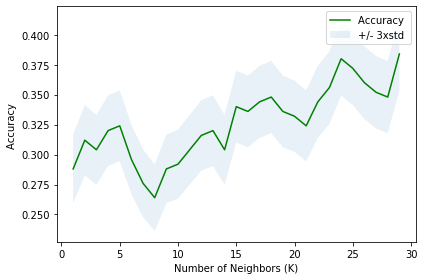

In [85]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [64]:
# With best value of K
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=8)

In [65]:
X_test_predicted = knn.predict(X_test)
X_test_predicted

array([1, 1, 1, 4, 1, 1, 2, 2, 1, 1, 4, 3, 1, 2, 1, 4, 3, 3, 4, 1, 3, 1,
       2, 1, 4, 3, 1, 4, 3, 1, 3, 3, 1, 4, 2, 3, 3, 2, 4, 2, 3, 2, 4, 3,
       2, 3, 3, 1, 3, 1, 2, 2, 1, 4, 4, 1, 3, 1, 1, 1, 1, 1, 4, 2, 1, 3,
       1, 3, 4, 3, 4, 3, 2, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 2, 3, 3, 1, 3,
       3, 3, 1, 3, 1, 1, 3, 2, 4, 4, 1, 1, 1, 2, 1, 1, 4, 3, 3, 1, 4, 2,
       3, 2, 1, 4, 1, 1, 1, 3, 3, 1, 2, 2, 4, 1, 2, 3, 3, 4, 2, 4, 1, 2,
       4, 2, 4, 3, 3, 1, 2, 3, 2, 1, 4, 1, 4, 4, 2, 3, 2, 3, 4, 2, 3, 3,
       3, 1, 4, 3, 4, 1, 3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 4, 3, 1, 1, 1, 1,
       2, 1, 4, 1, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 1, 2,
       4, 1, 4, 2, 1, 4, 4, 4, 4, 4, 1, 3, 1, 1, 1, 2, 1, 1, 2, 4, 2, 2,
       2, 3, 3, 1, 1, 1, 3, 1, 2, 4, 3, 1, 1, 3, 3, 3, 1, 4, 1, 2, 3, 1,
       2, 1, 2, 2, 3, 1, 1, 4], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
print(confusion_matrix(y_test, X_test_predicted))

[[41 12 16  8]
 [ 9 10 11 18]
 [23 11 28  6]
 [21 12 11 13]]


In [68]:
print(classification_report(y_test, X_test_predicted))

# Recall: Out of all the Actual Positive Class, how many were Predicted as Actuals
# Precision: Out of all the Predicted Positive Class, how many are Actually Positive.

              precision    recall  f1-score   support

           1       0.44      0.53      0.48        77
           2       0.22      0.21      0.22        48
           3       0.42      0.41      0.42        68
           4       0.29      0.23      0.25        57

    accuracy                           0.37       250
   macro avg       0.34      0.35      0.34       250
weighted avg       0.36      0.37      0.36       250

